# Assignment 4

## Sherwyn Braganza | Isaac McClanahan

**1) Use the make_moons dataset from scikit-learn with 500 samples, noise = 0.1 to make an artificial data-set.  This is a 2 class data-set.**

In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt

features, targets = datasets.make_moons(n_samples=500, shuffle=True, noise=0.1)

**2) Split this into training and validation data (no test data necessary here.**

In [3]:
x_train, y_train = features[0:400], targets[0:400]
x_val, y_val = features[400:], targets[400:]

**3) Plot both the training and validation datasets.**

/var/folders/m2/6gn8k9tn0rz56ryvkbgdrwsr0000gn/T/ipykernel_20700/3511063657.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


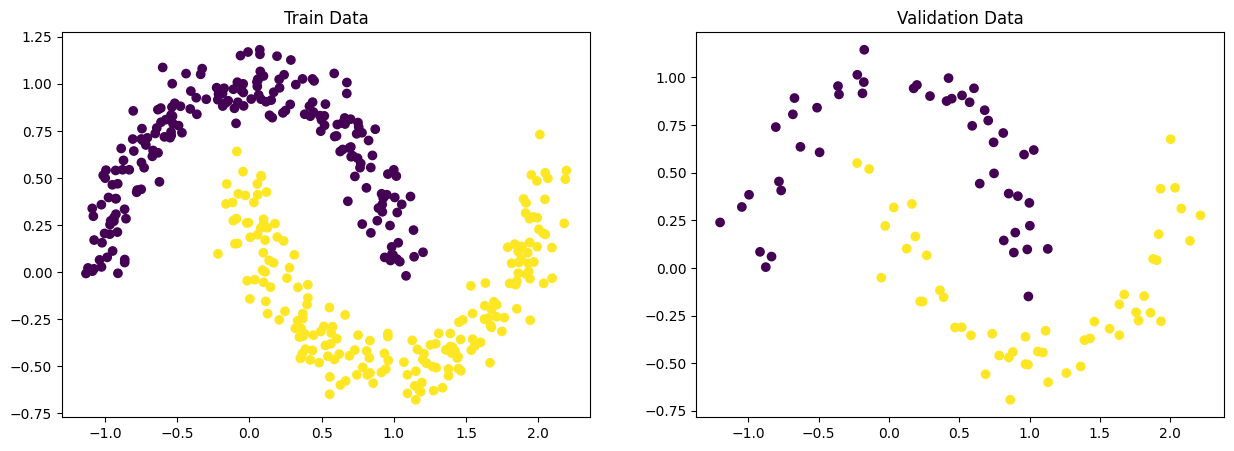

In [11]:
fig, axs = plt.subplots(1,2)
axs[0].scatter(x_train[:,0], x_train[:,1], c=y_train)
axs[0].set_title('Train Data')
axs[1].scatter(x_val[:,0], x_val[:,1], c=y_val)
axs[1].set_title('Validation Data')
fig.set_figwidth(20)
fig.set_figheight(5)
fig.show()